# Séance 3

## Objectifs de la séance

- Analyse d’un système en boucle fermée : feedback
- Analyse de la réponse indicielle et valeurs « idéales » de la réponse à un échelon
- Influence du correcteur proportionnel sur les caractéristiques temporelles : dépassement, temps de réponse, ... et sur les pôles du système en BF.

In [1]:
from IPython.display import Image, display, Markdown

from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of HELMo Gramme

## Etude d'un système en boucle fermée

:::{image} ../images/3_EtudeBF.png
:alt: systBF
:width: 250px
:align: right
:::

Soit un système en boucle fermée dont la fonction de transfert est :

$$
 H_{BO}(s)=\frac{20}{s^2+2s+10}
$$

In [2]:
num = 20
den = [1, 2, 10]
H_BO = ml.tf(num, den)

Pour en déduire la fonction de transfert en boucle fermée, il suffit d'utiliser la fonction `feedback` qui possède 2 paramètres : la fct de transfert en chaîne directe et celle en chaîne de retour (ici retour unitaire).

In [3]:
H_BF = ml.feedback(H_BO, 1)
print("H_BF =", H_BF)

H_BF = 
      20
--------------
s^2 + 2 s + 30



:::{note}
Vous pouvez le vérifier en calculant la fonction en BF par la formule de Black.
:::

Identifiez $\omega_n$ et $\zeta$:

In [4]:
wn, z, poles = ml.damp(H_BF, doprint=False); # doprint = False afin de ne pas afficher les résultat mais seulement de les stocker. 
print("wn = {:.3f} rad/s et zeta = {:.3f}.".format(wn[0], z[0]),) # la fonction 'format()' permet de gérer le nombre de décimales qu'on souhaite afficher dans la chaîne de caractères. 

wn = 5.477 rad/s et zeta = 0.183.


Visualisez les grandeurs caractéristiques de la réponse indicielle en BF :

DCGain : 0.6661408393656921
Overshoot : 55.92386513929972
Peak : 1.038672544010361
PeakTime : 0.5830728528313754
RiseTime : 0.21623436366850776
SettlingTime : 2.997574773027652


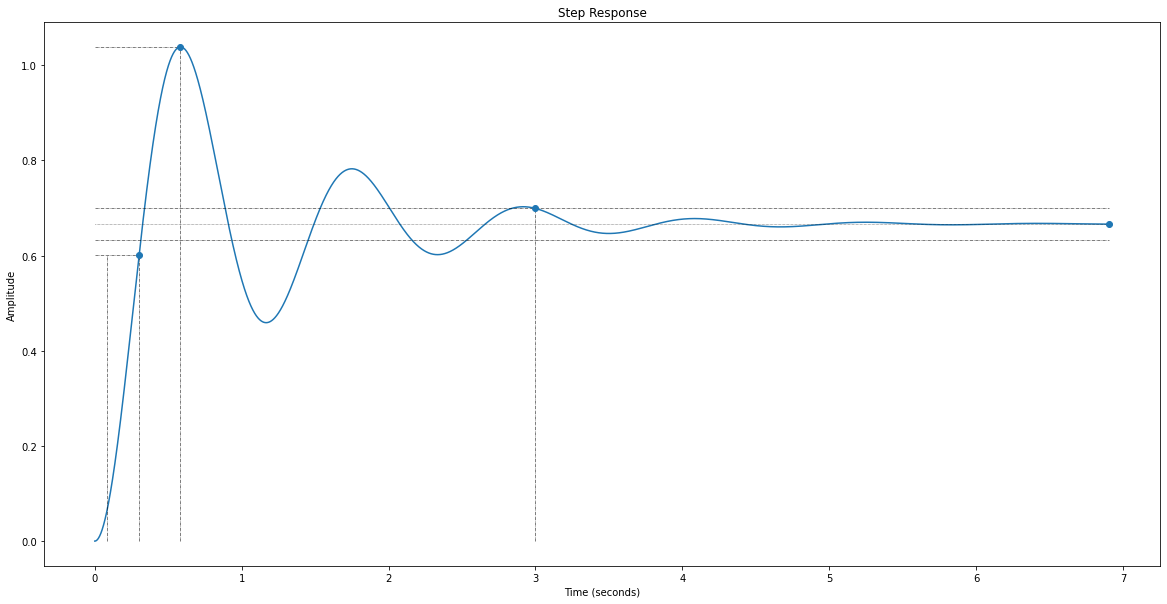

In [5]:
fig = plt.figure("Step",figsize=(20,10)) # Création de la fenêtre à une taille donnée.
info = rlf.stepWithInfo(H_BF, NameOfFigure="Step") # Traçage de la réponse indicielle et sauvegarde des informations dans l'objet info.
rlf.printInfo(info) # Affiche les informations stockées dans l'objet info.

:::{note}
Vous pouvez vérifier le gain en régime établi (DCGain):
- en mettant la fonction en BF sous forme canonique et en identifiant le numérateur : ...
- OU en faisant s$\rightarrow$0 : ...
:::

Comme le système asservi est à retour unitaire, la valeur finale de la réponse (régime permanent) devrait être égale à 1.

L’écart entre la valeur idéale (......) et la valeur réelle (......) permet de qualifier la précision du système. L’écart exprimé en % est appelé erreur de position : $\varepsilon_0$ ou $\varepsilon_p$ (cf. Chapitre 6).

Ici $\varepsilon_0$ = ...... %

:::{admonition} Astuce
:class: tip
Les informations stockées dans l'objet `info` sous forme d'atributs sont accessible en écrivant `info.attibut`.

*Exemple:* 

    info.Overshoot 
:::

In [6]:
e_pos = (1 - info.DCGain)*100
print("L'erreur de position vaut ici:", e_pos, "%.")

L'erreur de position vaut ici: 33.385916063430784 %.


Observez la valeur du dépassement en absolu et en relatif :
- Absolu = peak = ...
- Relatif = overshoot = ...

Vérifiez que `info.Peak` correspond à ```dcgain(H_BF)*(1+info.Overshoot/100)```

In [7]:
print("- Le dépassement absolu vaut:", info.Peak)
print("- Le dépassement relatif vaut:", info.Overshoot, "%.")

- Le dépassement absolu vaut: 1.038672544010361
- Le dépassement relatif vaut: 55.92386513929972 %.


### Exemple 1 p 3-13

Un asservissement de vitesse **à retour unitaire** possède une fonction de transfert en BO :

$$
 G(s)=\frac{K}{(1+s)(1+2s)}
$$

#### 1.

Tracez, pour différentes valeurs de K : 1 2 3 4 5 6 et 10, la réponse indicielle du système **en boucle fermée à retour unitaire**. 

Pourquoi insiste-t-on sur le fait qu’il doit être à retour unitaire ?

Les résultats pour K = 1 sont:
DCGain : 0.499616798918951
Overshoot : 2.916419399904391
Peak : 0.5141877201678046
PeakTime : 4.749326428433763
RiseTime : 2.283471725385434
SettlingTime : 3.118933143265462

Les résultats pour K = 10 sont:
DCGain : 0.9088257077904426
Overshoot : 34.672037627934586
Peak : 1.2239340991678875
PeakTime : 1.4139286399623403
RiseTime : 0.5738615913332494
SettlingTime : 3.3879019790107407


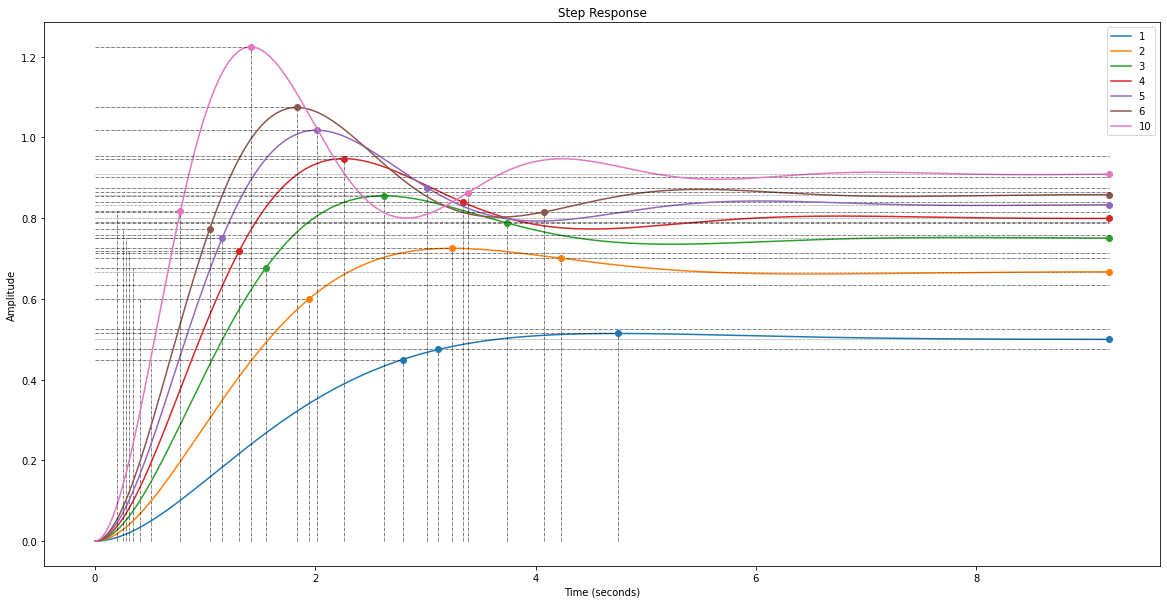

In [8]:
K_values = [1, 2, 3, 4, 5, 6, 10]

# Création de la fenêtre à une taille donnée
fig = plt.figure("Steps",figsize=(20,10))
ax = fig.subplots()

# Réponse indicielle
# Calcule les différentes fonctions de transfert ainsi que la réponse indicielle
info = []
for K in K_values: 
    G1 = ml.tf([K], [1, 1]) # Calcul la fonction de transfert en foncion de K
    G2 = ml.tf([1], [2, 1])
    G_BO = G1*G2
    G_BF = ml.feedback(G_BO)
    info.append(rlf.stepWithInfo(G_BF, NameOfFigure='Steps', sysName=K))

# Impression des résultats pour K = 1 et K = 10
print("Les résultats pour K = 1 sont:")
rlf.printInfo(info[0])
print("\nLes résultats pour K = 10 sont:")
rlf.printInfo(info[-1]) # -1 pour sélectionner le dernier élément de la liste info.

:::{toggle}
On insiste sur le fait que le système doit être à retour unitaire afin de directement pourvoir comparer l'entrée ( = consigne) et le sortie de celui-ci.
:::

Observez l’effet sur les grandeurs caractéristiques de la réponse et concluez :

$\nearrow$ K a pour effet de:

- …… l’erreur ($\varepsilon_0$)

- …… la précision (steady state)

- …… le temps de montée

- …… le dépassement

- …… le temps de réponse à 5%

:::{toggle}
$\nearrow$ K a pour effet de:

- $\searrow$ l’erreur ($\varepsilon_0$)

- $\nearrow$ la précision (steady state)

- $\searrow$ le temps de montée

- $\nearrow$ le dépassement

- $\nearrow$ ou $\searrow$ le temps de réponse à 5% en suivant l'abaque de la page 3-12
:::

:::{note} 
K modélise en fait un correcteur P dont vous venez de montrer les principales caractéristiques 🙂
:::

#### 2. 

Déterminez par essai et erreur la valeur de K pour obtenir une réponse indicielle en BF présentant un dépassement de 20%.

K = ......

:::{toggle}
$K \simeq 4.5$
:::

#### 3.

Estimez cette valeur en exploitant les relations et/ou abaques :

:::{toggle}
On a:

$$
G_{BO}(s)=\frac{K}{(1+s)(1+2s)}=\frac{K}{2s^2+3s+1} \Rightarrow G_{BF}(s)=\frac{K}{2s^2+3s+1+K}=\frac{\frac{K}{K+1}}{\frac{2}{K+1}s^2+\frac{3}{K+1}s+1}
$$

On obtient donc par identification:

$$
\left\{
    \begin{array}{ll}
        \frac{2\zeta}{\omega_n}=\frac{3}{K+1}\\
        \frac{1}{\omega_n^2}=\frac{2}{K+1}
    \end{array}
\right.
$$

Or via l'équation du dépassement (cf. p.3-11), on peut déduire $\zeta$:

$$
D_P=100*e^{-\frac{k\pi\zeta}{\sqrt{1-\zeta^2}}} \Rightarrow 20=100*e^{-\frac{\pi\zeta}{\sqrt{1-\zeta^2}}} \Rightarrow \zeta=0.456
$$

Dès lors, on obtient:

$$
\begin{alignat*}{2}
\left\{ \begin{aligned}
    \begin{array}{ll}
        \frac{3}{K+1}=\frac{0.9}{\omega_n} \\
        \frac{1}{\omega_n^2}=\frac{2}{K+1}
    \end{array}
\end{aligned}\right.
\Rightarrow
\left\{ \begin{aligned}
    \begin{array}{ll}
        \mathbf{K=4.4} \\
        \omega_n=1.66
    \end{array}
\end{aligned}\right.
\end{alignat*}\
$$
:::

#### 4. 

Vérifiez les paramètres caractéristiques de la réponse obtenue pour cette valeur de K :

In [9]:
K = 4.4

G1 = ml.tf([K], [1, 1]) # Calcul la fonction de transfert en foncion de K
G2 = ml.tf([1], [2, 1])
G_BO = G1*G2
G_BF = ml.feedback(G_BO)

info = rlf.stepWithInfo(G_BF)
plt.close() # Si on souhaite ne pas afficher le graphe renvoyé par stepWithInfo
print("Dépassement =", info.Overshoot, "%") # \n pour ajouter une ligne vide après 

wn, z, __ = ml.damp(G_BF, doprint=False);
print("zeta =", z[0])
print("wn =", wn[0], "rad/s")

Dépassement = 20.07967668512085 %
zeta = 0.4564354645876384
wn = 1.6431676725154984 rad/s


#### 5.
Tracez un diagramme reprenant les différentes réponses indicielles en fonction de K et un diagramme reprenant la position des pôles du système en boucle fermée pour visualiser l’impact de K (un correcteur proportionnel) sur la BF :

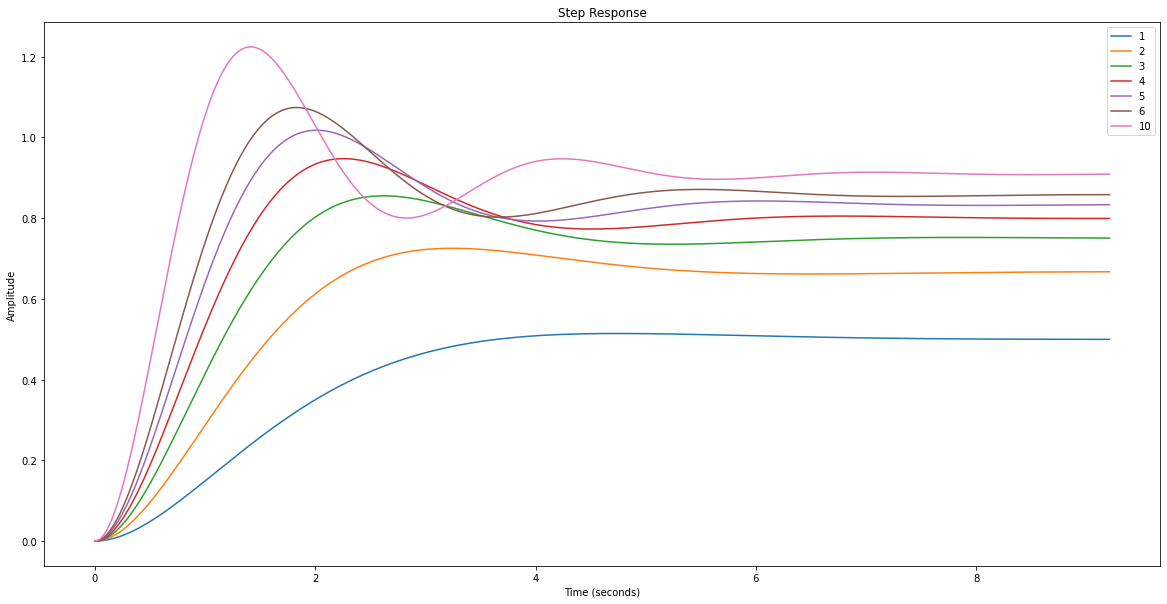

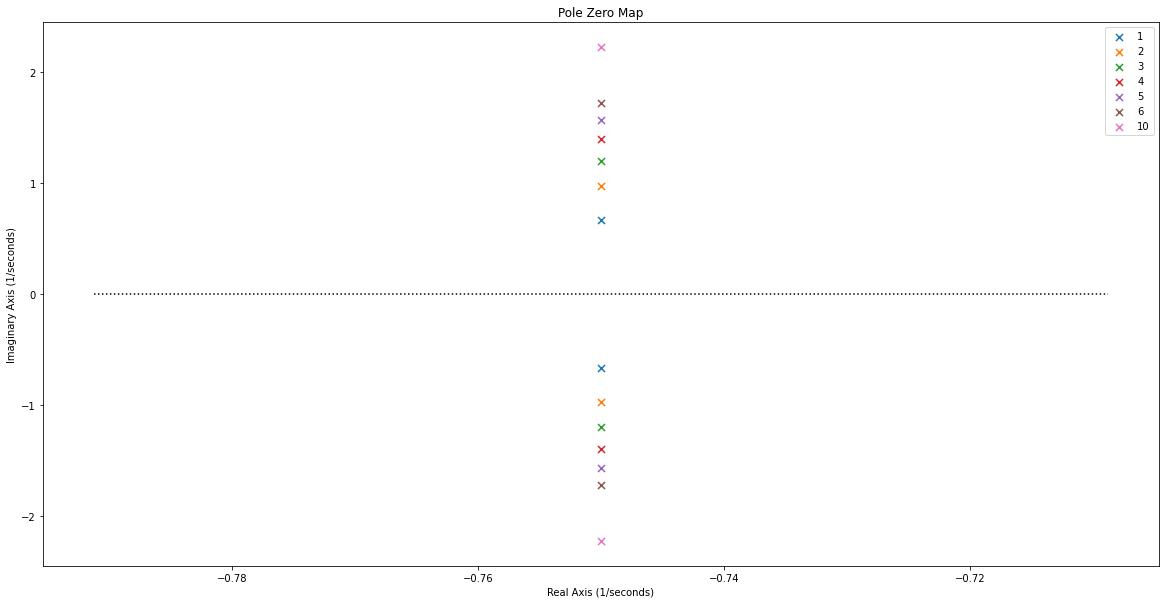

In [10]:
K_values = [1, 2, 3, 4, 5, 6, 10]

# %% Réponses indicielles

# Création de la fenêtre à une taille donnée
fig = plt.figure("Steps",figsize=(20,10))
ax = fig.subplots()

# Réponse indicielle
# Calcule les différentes fonctions de transfert ainsi que la réponse indicielle
info = []
for K in K_values: 
    G1 = ml.tf([K], [1, 1]) # Calcul la fonction de transfert en foncion de K
    G2 = ml.tf([1], [2, 1])
    G_BO = G1*G2
    G_BF = ml.feedback(G_BO)
    info.append(rlf.step_(G_BF, NameOfFigure='Steps', sysName=K))

# %% Pôles 
    
# Création de la fenêtre à une taille donnée
fig = plt.figure("Pole Zero Map",figsize=(20,10))
ax = fig.subplots()

# Pour pouvoir boucler sur les couleurs standards afin de directement jouer avec les couleurs des graphes
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])

# Trace les poles et zéros pour chacune des fonctions de transfert stockées dans 'g'
for K in K_values: 
    G1 = ml.tf([K], [1, 1]) # Calcul la fonction de transfert en foncion de K
    G2 = ml.tf([1], [2, 1])
    G_BO = G1*G2
    G_BF = ml.feedback(G_BO)
    poles, zeros = rlf.pzmap(G_BF, NameOfFigure="Pole Zero Map", sysName=K, color=next(colors));
left, right = plt.xlim() # Stocke les limites gauche et droite du graphe
plt.plot([left, right], [0, 0], 'k:'); # Ligne horizontale passant par 0 pour marquer l'axe des imaginaires

:::{admonition}Justification
:class: toggle
$p = \sigma \pm j\omega_d$ avec 
$
\begin{alignat*}{2}
\left\{ \begin{aligned}
    \begin{array}{ll}
        \sigma=-\zeta\omega_n \\
        \omega_d=\omega_n \sqrt{1-\zeta^2}
    \end{array}
\end{aligned}\right.
\Leftrightarrow
\left\{ \begin{aligned}
    \begin{array}{ll}
        \sigma=cte \\
        \omega_d=f(K)
    \end{array}
\end{aligned}\right.
\end{alignat*}\
$
:::

## Effet d’un correcteur proportionnel de gain A

Reprenez l’application 1 d’asservissement de vitesse, le schéma-bloc du système est :

:::{image} ../images/3_Appli1.png
:alt: Appli1
:align: center
:::

### a) Sur un système du $1^{er}$ ordre

On a $H_m(p)=\frac{31.25}{10.875*10^{-3}*p+1}$ **si on néglige l**, soit:

$$
H_{BO}(p)=\frac{A}{10.875*10^{-3}*p+1}
$$

Calculez la fonction de transfert de boucle fermée pour A (1,2,5,9,20,40,60,100, ...) :

- Par calcul:

:::{toggle}
$$
H_{BF}(p)=\frac{A}{10.875*10^{-3}*p+1+A}= \frac{\frac{A}{A+1}}{\frac{10.875*10^{-3}*p}{A+1}+1}
$$
:::

- Via Python:

In [11]:
A_values = [1,2,5,9,20,40,60,100]
H_BOs = []
H_BFs = []
for A in A_values:
    H_BO = ml.tf(A, [10.875e-3, 1])
    H_BOs.append(H_BO)
    H_BF = ml.feedback(H_BO, 1)
    H_BFs.append(H_BF)
    print(H_BF)


      1
-------------
0.01087 s + 2


      2
-------------
0.01087 s + 3


      5
-------------
0.01087 s + 6


      9
--------------
0.01087 s + 10


      20
--------------
0.01087 s + 21


      40
--------------
0.01087 s + 41


      60
--------------
0.01087 s + 61


      100
---------------
0.01087 s + 101



Quel est l’effet d’une augmentation de A sur:

- Le gain statique?

- L'erreur de position?

- La constante de temps?

Le gain statique pour A = 1 vaut 0.4995000000001194  et pour A = 100 : 0.9891089108911346
=> le gain statique se rapproche de 1.

L'erreur de position pour A = 1 vaut 0.5004999999998806  et pour A = 100 : 0.010891089108865382
=> L'erreur de position diminue.

La constante de temps pour A = 1 vaut 0.0032373237601893436 s et pour A = 100 : 6.41054209938484e-05 s.
=> La constante de temps diminue.




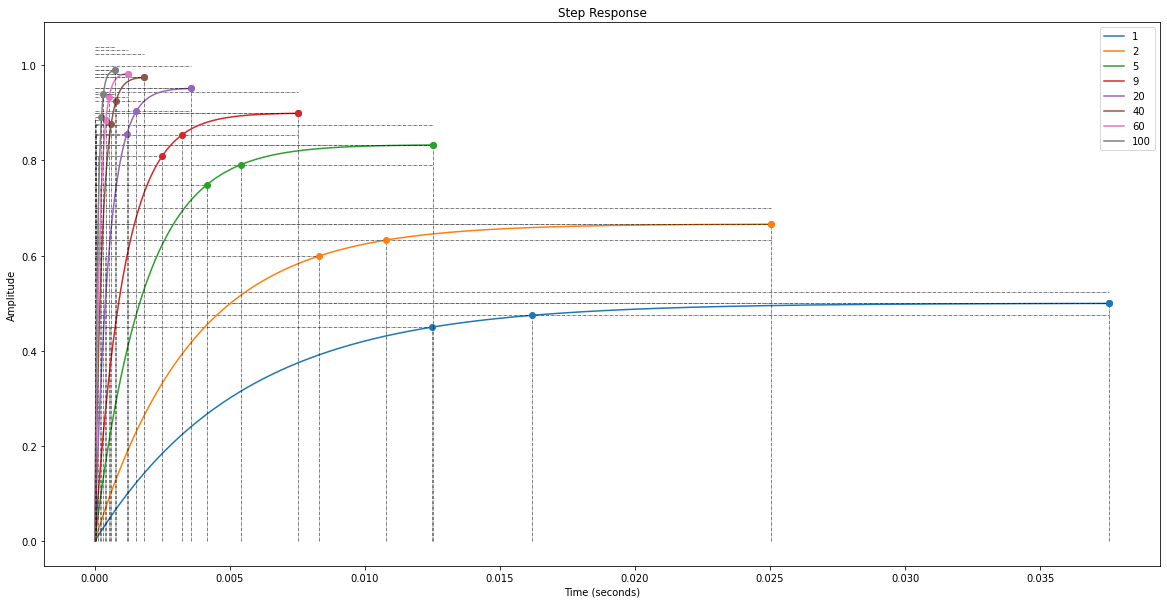

In [12]:
# Création de la fenêtre à une taille donnée
fig = plt.figure("Steps with infos",figsize=(20,10))
ax = fig.subplots()

infos = []
for i, H_BF in enumerate(H_BFs):
    infos.append(rlf.stepWithInfo(H_BF, NameOfFigure='Steps with infos', sysName=A_values[i]))
    
print("Le gain statique pour A = 1 vaut", infos[0].DCGain, " et pour A =", A_values[-1],":", infos[-1].DCGain)
print("=> le gain statique se rapproche de 1.\n")
print("L'erreur de position pour A = 1 vaut", 1-infos[0].DCGain, " et pour A =", A_values[-1],":", 1-infos[-1].DCGain)
print("=> L'erreur de position diminue.\n")
print("La constante de temps pour A = 1 vaut", infos[0].SettlingTime/5, "s et pour A =", A_values[-1],":", infos[-1].SettlingTime/5, "s.") # Valeur à 95% de la valuer finale -> 5*tau
print("=> La constante de temps diminue.\n")
print("") # Pour laisser un espace supplémentaire entre les réponses écrites et les graphes

### b) Sur un système du $2^{nd}$ ordre

On a $H_m(p)=\frac{31.25}{1.36*10^{-6}*p^2+10.875*10^{-3}*p+1}$ **si on tient compte de l**, soit:

$$
H_{BO}(p)=\frac{A}{1.36*10^{-6}*p^2+10.875*10^{-3}*p+1}
$$

Calculez la fonction de transfert de boucle fermée pour ces différentes valeurs de A:

- Par calcul:

:::{toggle}
$$
H_{BF}(p)=\frac{A}{1.36*10^{-6}*p^2+10.875*10^{-3}*p+1+A}= \frac{\frac{A}{A+1}}{\frac{1.36*10^{-6}*p^2+10.875*10^{-3}*p}{A+1}+1}
$$
:::

- Via Python:

In [13]:
A_values = [1,2,5,9,20,40,60,100]
H_BOs = []
H_BFs = []
for A in A_values:
    H_BO = ml.tf(A, [1.36e-6, 10.875e-3, 1])
    H_BOs.append(H_BO)
    H_BF = ml.feedback(H_BO, 1)
    H_BFs.append(H_BF)
    print(H_BF)


             1
----------------------------
1.36e-06 s^2 + 0.01087 s + 2


             2
----------------------------
1.36e-06 s^2 + 0.01087 s + 3


             5
----------------------------
1.36e-06 s^2 + 0.01087 s + 6


              9
-----------------------------
1.36e-06 s^2 + 0.01087 s + 10


             20
-----------------------------
1.36e-06 s^2 + 0.01087 s + 21


             40
-----------------------------
1.36e-06 s^2 + 0.01087 s + 41


             60
-----------------------------
1.36e-06 s^2 + 0.01087 s + 61


             100
------------------------------
1.36e-06 s^2 + 0.01087 s + 101



Quel est l’effet d’une augmentation de A sur:

- Le gain statique?

- L'erreur de position?

Le gain statique pour A = 1 vaut 0.49948764085922653  et pour A = 100 : 0.9889924129751736
=> le gain statique se rapproche de 1.

L'erreur de position pour A = 1 vaut 0.5005123591407734  et pour A = 100 : 0.011007587024826404
=> L'erreur de position diminue.




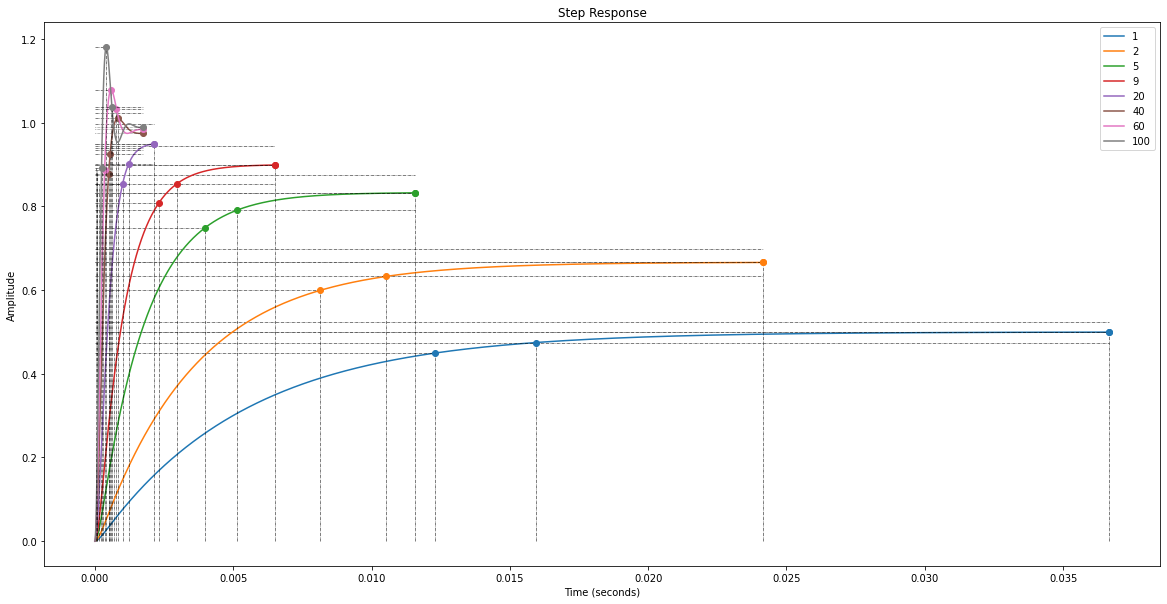

In [14]:
# Création de la fenêtre à une taille donnée
fig = plt.figure("Steps with infos",figsize=(20,10))
ax = fig.subplots()

infos = []
for i, H_BF in enumerate(H_BFs):
    infos.append(rlf.stepWithInfo(H_BF, NameOfFigure='Steps with infos', sysName=A_values[i]))
    
print("Le gain statique pour A = 1 vaut", infos[0].DCGain, " et pour A =", A_values[-1],":", infos[-1].DCGain)
print("=> le gain statique se rapproche de 1.\n")
print("L'erreur de position pour A = 1 vaut", 1-infos[0].DCGain, " et pour A =", A_values[-1],":", 1-infos[-1].DCGain)
print("=> L'erreur de position diminue.\n")
print("") # Pour laisser un espace supplémentaire entre les réponses écrites et les graphes

**En déduire l'effet d'un correcteur proportionnel sur le régime établi:** ...

:::{toggle}
Un correcteur proportionnel a pour effet d'améliorer la précision du système en régime établi.
:::

Quel est l’effet d’une augmentation de A sur:

- La pulsation naturelle ($\omega_n$)?

- Le coefficient d'amortissement ($\zeta$)?

- La pseudo pulsation ($\omega_d$)?

- L'amortissement ($\sigma$)?

:::{admonition} Rappel
:class: note
$
\left. \begin{array}{r} 
        p_1 \\
        p_2
\end{array} \right\}
= \omega_n*(-\zeta \pm j\sqrt{1-\zeta^2})
= \sigma \pm j\omega_d
$
(*cf. page 3-7*)
:::

La pulsation naturelle pour A = 1 vaut 7807.97924871505 rad/s et pour A = 100 : 8617.697249402125 rad/s
=> wn augmente.

Le coefficient d'amortissement pour A = 1 vaut 1.0 et pour A = 100 : 0.46394780983786194
=> z diminue.

La pseudo pulsation pour A = 1 vaut 0.0 rad/s et 0.0 rad/s et pour A = 100 : 7634.0951255271175 rad/s et -7634.0951255271175 rad/s
=> wd diverge de 0 => Le système oscille plus.

L'amortissement pour A = 1 vaut -7807.97924871505 et -188.3442806967156 et pour A = 100 : -3998.161764705883 et -3998.161764705883
=> sigma converge vers une seule valeur => Le système est plus rapide.



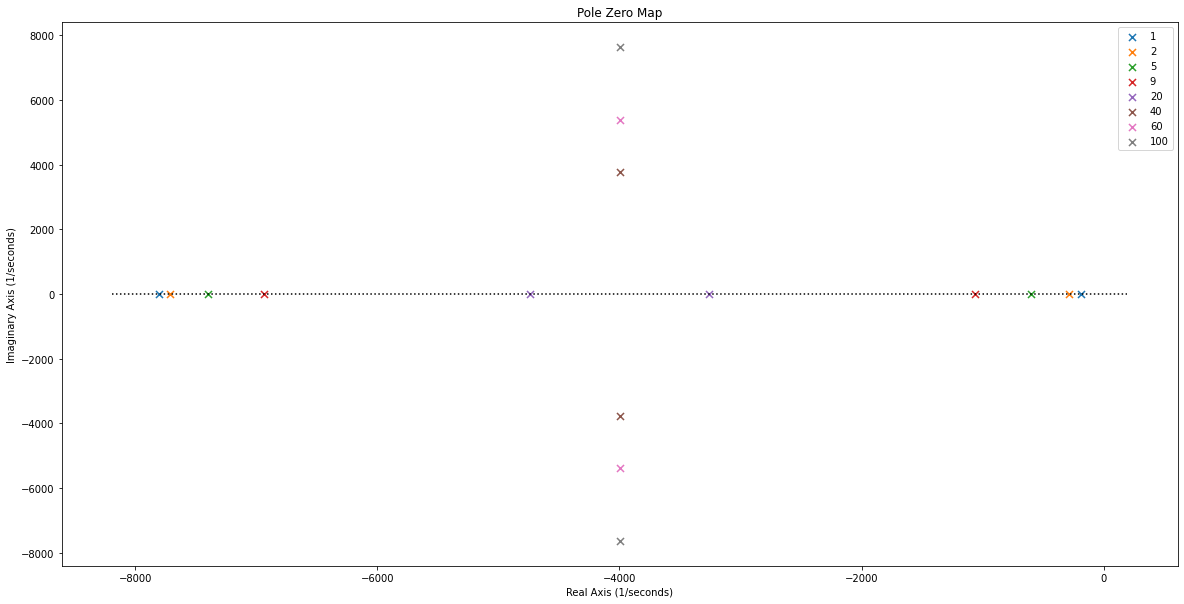

In [15]:
# Caractéristiques typiques
# -------------------------
wn_0, z_0, __ = ml.damp(H_BFs[0], doprint=False);
wn_fin, z_fin, __ = ml.damp(H_BFs[-1], doprint=False);
print("La pulsation naturelle pour A = 1 vaut", wn_0[0], "rad/s et pour A =", A_values[-1],":", wn_fin[0], "rad/s")
print("=> wn augmente.\n")

print("Le coefficient d'amortissement pour A = 1 vaut", z_0[0], "et pour A =", A_values[-1],":", z_fin[0])
print("=> z diminue.\n")


# Pôles
# -----

# Création de la fenêtre à une taille donnée
fig = plt.figure("Pole Zero Map",figsize=(20,10))
ax = fig.subplots()

# Pour pouvoir boucler sur les couleurs standards afin de directement jouer avec les couleurs des graphes
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])

# Trace les poles et zéros pour chacune des fonctions de transfert stockées dans 'g'
for i, H_BF in enumerate(H_BFs):
    poles, zeros = rlf.pzmap(H_BF, NameOfFigure="Pole Zero Map", sysName=A_values[i], color=next(colors));
left, right = plt.xlim() # Stocke les limites gauche et droite du graphe
plt.plot([left, right], [0, 0], 'k:'); # Ligne horizontale passant par 0 pour marquer l'axe des imaginaires

poles_0, __ = ml.pzmap(H_BFs[0], plot=False);
poles_fin, __ = ml.pzmap(H_BFs[-1], plot=False);
print("La pseudo pulsation pour A = 1 vaut", poles_0.imag[0], "rad/s et", poles_0.imag[-1], "rad/s et pour A =", A_values[-1],":", poles_fin.imag[0], "rad/s et", poles_fin.imag[-1], "rad/s")
print("=> wd diverge de 0 => Le système oscille plus.\n")

print("L'amortissement pour A = 1 vaut",  poles_0.real[0], "et", poles_0.real[-1], "et pour A =", A_values[-1],":", poles_fin.real[0], "et", poles_fin.real[-1])
print("=> sigma converge vers une seule valeur => Le système est plus rapide.\n")

**En déduire l'effet d'un correcteur proportionnel sur le régime transitoire:** ...

:::{toggle}
Un correcteur proportionnel a pour effet de rendre le système plus rapide (= diminuer le temps de montée) au détriment de la stabilité du système en régime transitoire.
:::